Portfolio Optimization
Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Define Tickers and Time Range
Define list of Tickers
Set the end date to today
Set the start date tp 5 years ago

In [3]:
# Section 1: Define Tickers and Time Range
tickers = ['VEQT.TO', 'XEI.TO', 'XBB.TO', 'XMV.TO', 'VFV.TO']
end_date = datetime.today()
print(end_date)
start_date = end_date - timedelta(days=5*365)
print(start_date)

2024-05-20 10:47:35.591385
2019-05-22 10:47:35.591385


Download Adjusted Closed Prices
Create an empty DataFrame to store the adfjusted close prices
Download the close prices for each ticker

In [4]:
# Section 2: Download Adjusted Close Prices
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Dropna is drop any missing value

In [5]:
# Section 3: Calculate Lognormal Returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()

In [6]:
# Section 4: Calculate Covariance Matrix
cov_matrix = log_returns.cov() * 252

In [7]:
# Section 5: Define Portfolio Performance Metrics
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

In [8]:
# Section 6: Portfolio Optimization
risk_free_rate = 0.02

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(tickers))]
initial_weights = np.array([1/len(tickers)] * len(tickers))

optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate),
                             method='SLSQP', constraints=constraints, bounds=bounds)

In [9]:
#Section 7: Analyze the Optimal Portfolio
optimal_weights = optimized_results.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
VEQT.TO: 0.4000
XEI.TO: 0.0000
XBB.TO: 0.0000
XMV.TO: 0.2000
VFV.TO: 0.4000
Expected Annual Return: 0.1143
Expected Volatility: 0.1671
Sharpe Ratio: 0.5645


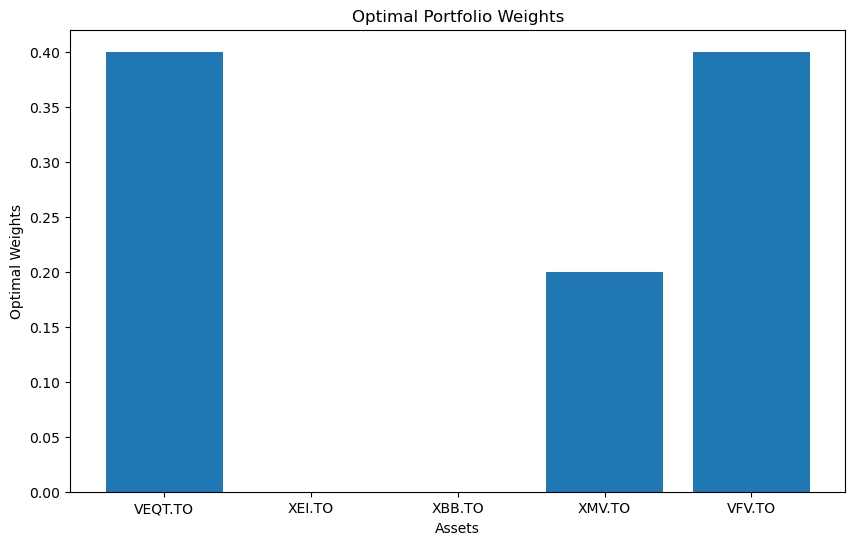

In [10]:
# Display the Final Portfolio in a Plot
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)
plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')
plt.show()